# Churn Prediction Model
**Goal:** build a machine learning model to predict if a bank's customer will churn (leave the bank) or not.
For each instance in the test set, you must predict a 0 or 1 value for the target variable  (Classifier).

I am going to create 5 models:
- **Model 1:** Random Forest Classifier 
- **Model 2:** Logistic Regression
- **Model 3:** Support Vector Machine
- **Model 4:** K-Nearest Neighbours
- **Model 5:** XGBoost 

I am also going to create these 5 models for when I've created and worked with features. So there will be a total of 10 models

### Setting Up

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics  import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Set up lists to log model performance
model_name=[]
train_acc=[]
test_acc=[]
precision=[]
recall=[]
f1=[]

In [3]:
data = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
all_features = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
                'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                'IsActiveMember', 'EstimatedSalary', 'Exited']
        
        
numerical_cols = data[all_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
print(" ")
categorical_cols = data[all_features].select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Numerical columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
 
Categorical columns: ['Surname', 'Geography', 'Gender']


# EDA + Features
## Understanding the Data

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.describe(include = ['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


#### Proportion of Customers Exited vs Stayed
I want to see how many customers have left the bank vs the number of customers who have stayed at the bank

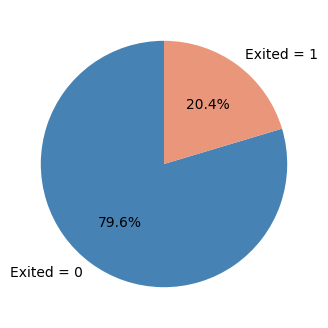

In [9]:
exit_counts = data['Exited'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(exit_counts, labels=['Exited = 0', 'Exited = 1'], colors=['steelblue', 'darksalmon'], autopct='%1.1f%%', startangle=90)

plt.show()

#### General Feature Importance
I am going to plot histograms with KDE plots and a correlation heatmap to gain an overview of what the features look like alone or with the target variable.

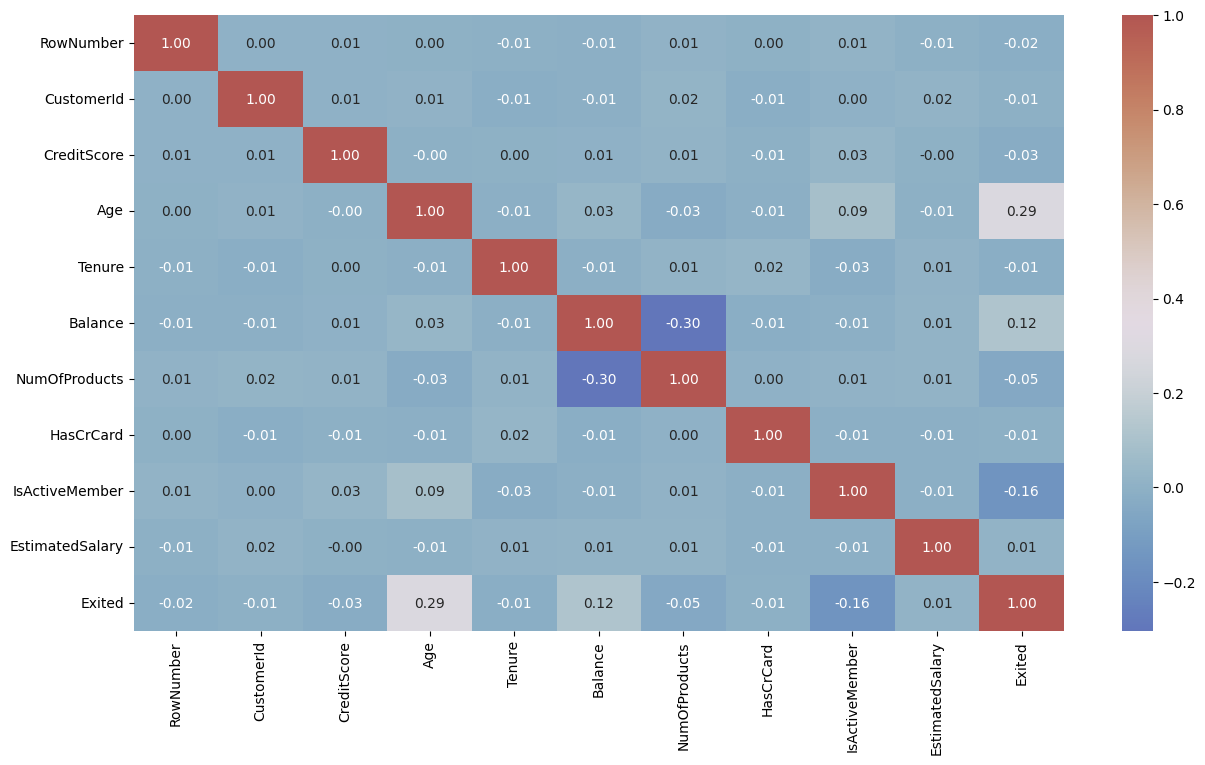

In [62]:
cmap = mcolors.LinearSegmentedColormap.from_list("cropped_cmap", plt.get_cmap('twilight_shifted')(np.linspace( 0.25 , 0.75, 256)))

plt.figure(figsize=(15,8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap = cmap, fmt='.2f')
plt.show()

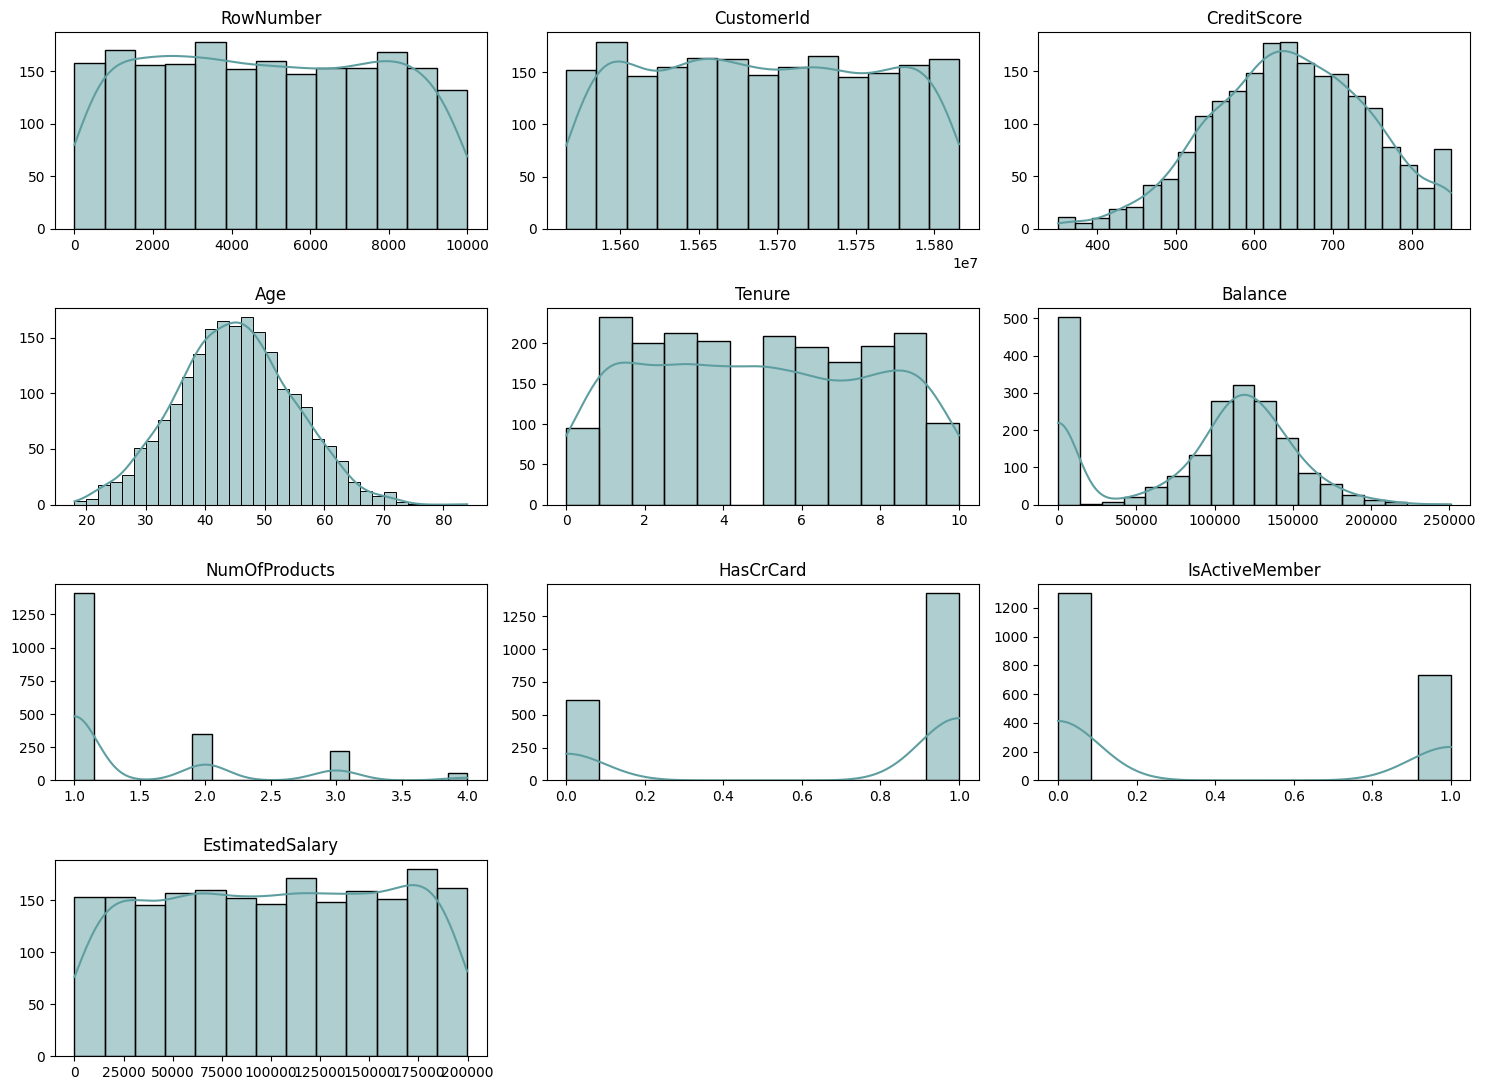

In [11]:
churned_rows = data[data['Exited'] == 1]
unchurned_rows= data[data['Exited'] == 0]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 11))
axs = axs.flatten()

for i, col in enumerate(churned_rows[numerical_cols]):
    sns.histplot(data=churned_rows, x=col, kde=True, ax=axs[i], color = 'cadetblue')
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    
fig.delaxes(axs[10])
fig.delaxes(axs[11])

plt.tight_layout()
plt.show()

#### Univariate Exploration
I want to get an idea about if some demographics of customers are more likely to churn than others

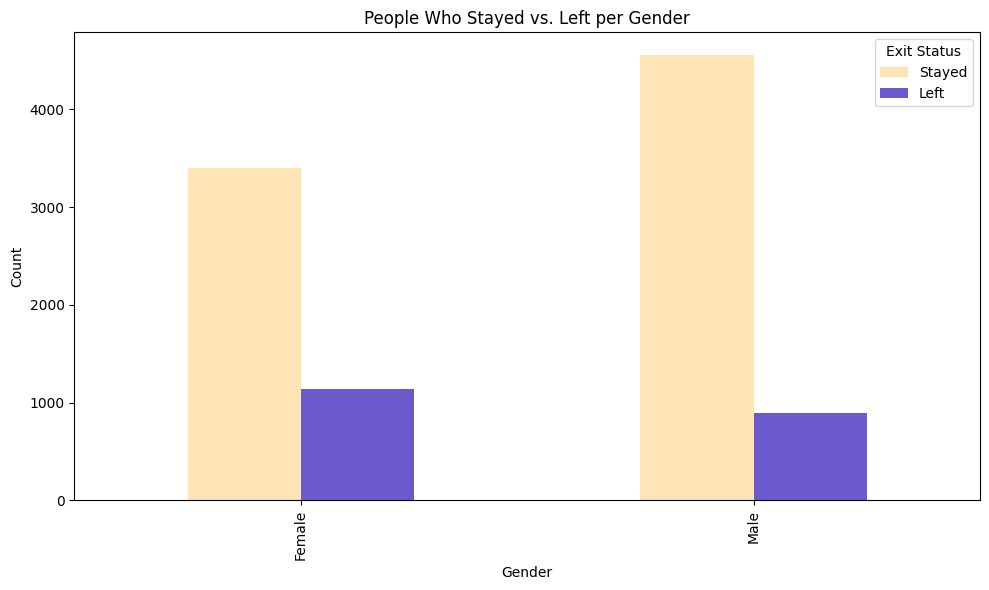

In [12]:
gender_distribution = data.groupby(['Gender', 'Exited']).size().unstack().fillna(0)

gender_distribution.plot(kind='bar', figsize=(10, 6), color=['moccasin', 'slateblue'])
plt.title('People Who Stayed vs. Left per Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exit Status', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

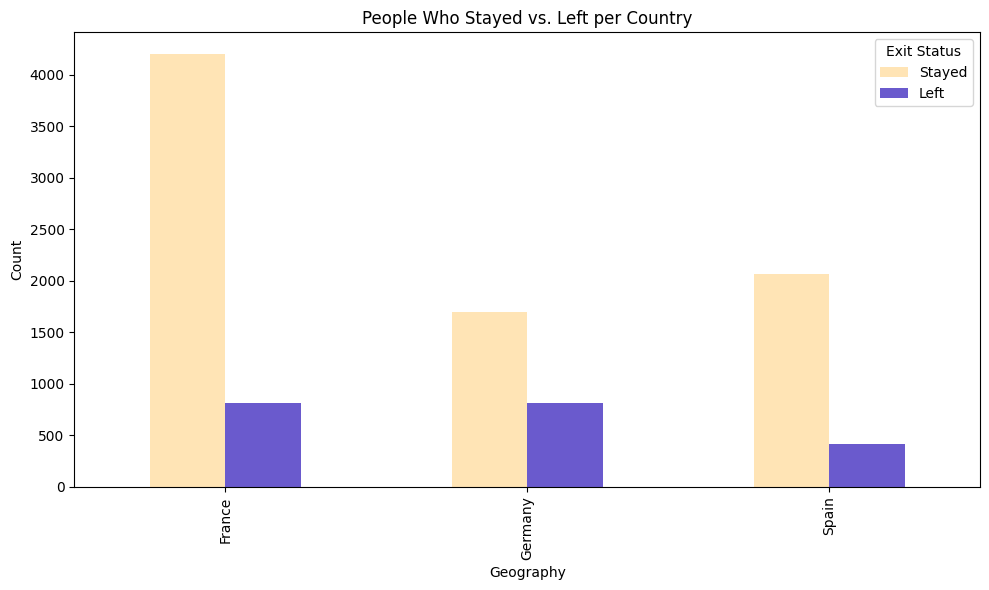

In [13]:
location_distribution = data.groupby(['Geography', 'Exited']).size().unstack().fillna(0)

location_distribution.plot(kind='bar', figsize=(10, 6), color=['moccasin', 'slateblue'])
plt.title('People Who Stayed vs. Left per Country')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exit Status', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

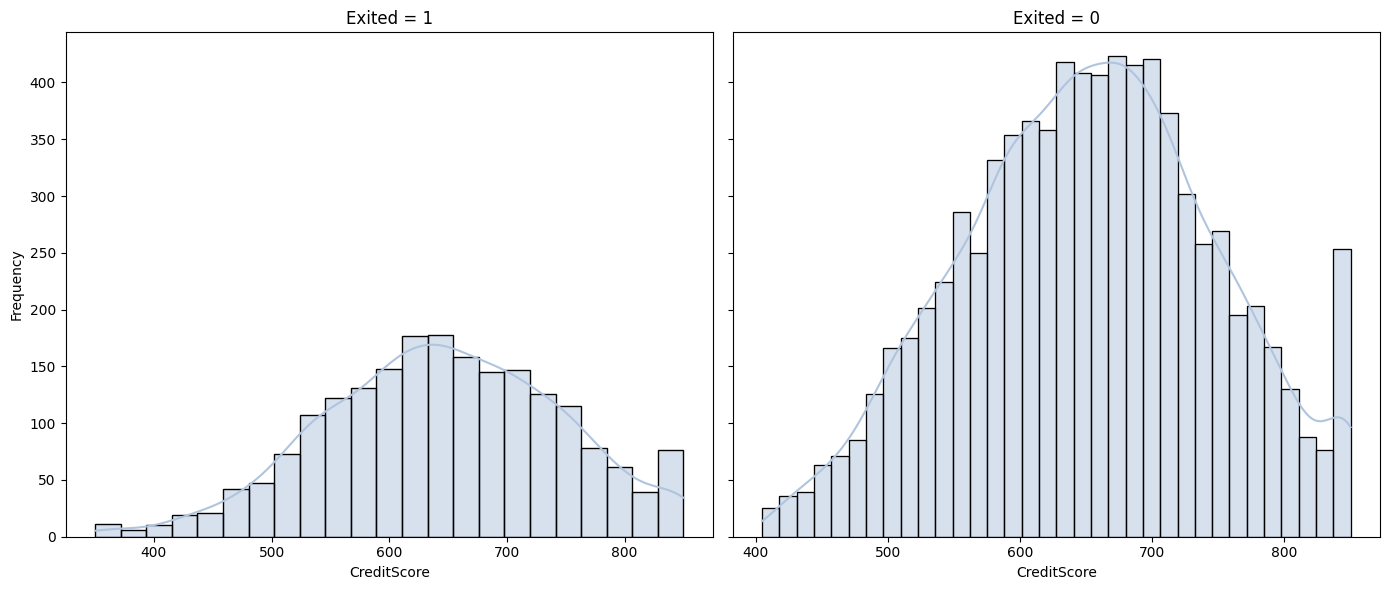

In [14]:
def plot_churned_histograms(column_name, colour):
    """
    Plots histograms and KDE plots for the given column based on exited status.
    
    Parameters:
    - column_name: Name of the column to plot
    - colour: Colour name you want
    """
    fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Histogram and KDE for Exited = 1
    data_survived = data[data['Exited'] == 1][column_name].dropna()
    
    sns.histplot(data_survived, kde=True, color=colour, edgecolor='black', ax=ax[0])
    ax[0].set_title('Exited = 1')
    ax[0].set_xlabel(column_name)
    ax[0].set_ylabel('Frequency')

    # Histogram and KDE for Exited = 0
    data_not_survived = data[data['Exited'] == 0][column_name].dropna()
    sns.histplot(data_not_survived, kde=True, color=colour, edgecolor='black', ax=ax[1])
    ax[1].set_title('Exited = 0')
    ax[1].set_xlabel(column_name)

    plt.tight_layout()
    plt.show()

plot_churned_histograms("CreditScore", "lightsteelblue")

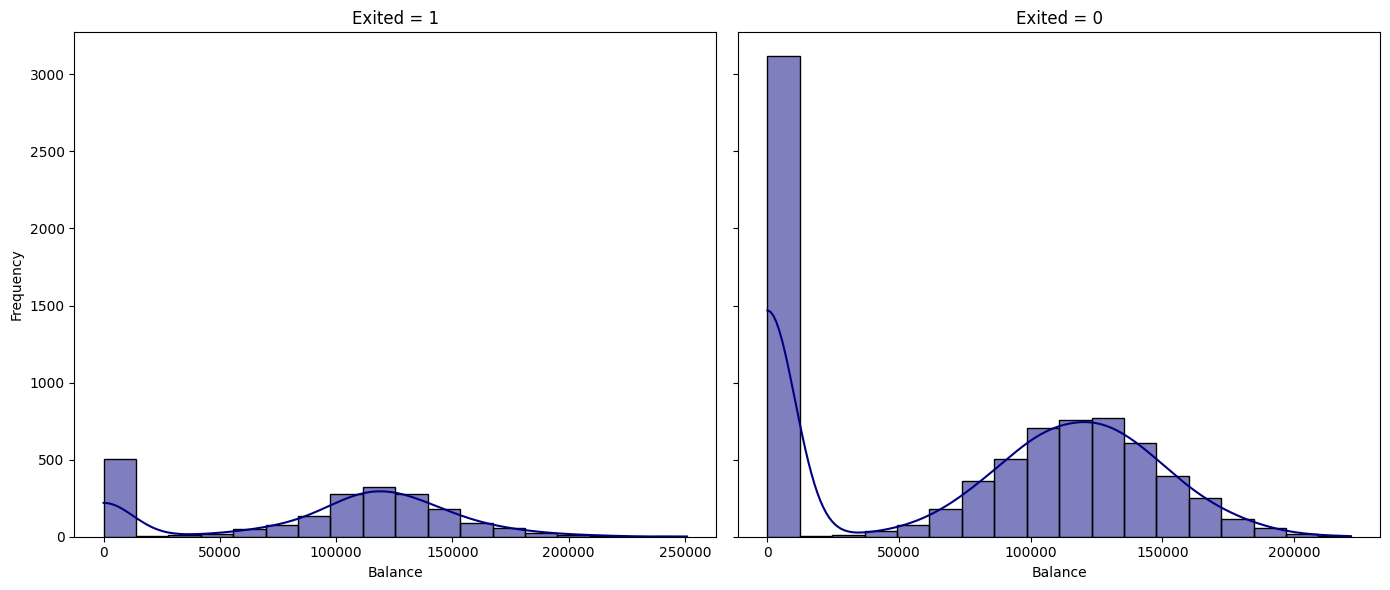

In [15]:
plot_churned_histograms("Balance", "navy")

## Feature Engineering
- **Age Group:** grouping customers into age categories can capture non-linear relationships and improve the model’s ability to identify patterns. This approach reduces noise and enhances interpretability by smoothing out variations within age ranges.
    - Age groups will be created based on bin size, allowing the model to detect specific patterns that may be associated with certain age brackets.
- **Balance to Estimated Salary Ratio:** this provides insight into a customer's financial stability. A higher ratio may indicate financial strain, which could increase the likelihood of the customer leaving the bank.
    - Get the ratio of the customers Balance to their EstimatedSalary
- **Tenure Group:** similar to age, tenure will be grouped into categories to capture non-linear effects and reduce noise. This helps the model recognize patterns associated with different lengths of customer tenure, which may not be as easily detected using tenure as a continuous variable.
    - Tenure groups will be created based on bin size, allowing the model to detect specific patterns that may be associated with certain tenure brackets.
- **Loyalty Index:** a composite feature reflecting customer loyalty. This aims to capture the likelihood of a customer churning.
    - Combine Tenure, IsActiveMember, and NumOfProducts into a single feature that reflects customer loyalty
    - With the IsActiveMember feature given a higher weight due to its stronger association with customer retention
- **Balance Above 0:** a binary feature indicating whether the customer's account balance is at or above zero. This simple indicator can help the model identify customers who might be at risk of leaving the bank if they are consistently maintaining a zero balance.

### 1. Age Group

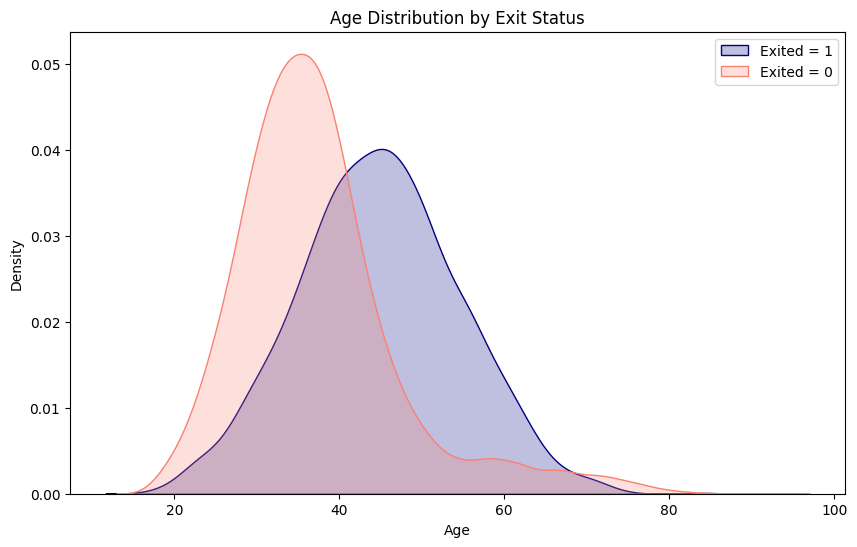

In [16]:
plt.figure(figsize=(10, 6))

sns.kdeplot(churned_rows['Age'], color='navy', label='Exited = 1', fill=True)
sns.kdeplot(unchurned_rows['Age'], color='salmon', label='Exited = 0', fill=True)

plt.title('Age Distribution by Exit Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [17]:
data2 = data.copy() # So I can see model success with and without features 
numerical_cols2 = numerical_cols.copy()

data2['AgeCut'] = pd.qcut(data2['Age'], 8)
data2.groupby(['AgeCut'], as_index=False)['Exited'].mean()

,AgeCut,Exited
0,"(17.999, 28.0]",0.074246
1,"(28.0, 32.0]",0.078156
2,"(32.0, 35.0]",0.098313
3,"(35.0, 37.0]",0.123126
4,"(37.0, 40.0]",0.168168
5,"(40.0, 44.0]",0.247381
6,"(44.0, 51.0]",0.456594
7,"(51.0, 92.0]",0.435201


In [18]:
def categorize_age(age):
    '''Categorizes age into bins'''
    if pd.isna(age):
        return None  
    elif age <= 17.9:
        return 0
    elif 17.9 <= age <= 28:
        return 1
    elif 28 <= age <= 32:
        return 2
    elif 32 < age <= 35:
        return 3
    elif 35 < age <= 37:
        return 4
    elif 37 < age <= 40:
        return 5
    elif 40 < age <= 44:
        return 6
    elif 44 < age <= 51:
        return 7
    else:  
        return 8

data2['Age'] = data2['Age'].apply(categorize_age)

data2.groupby(['Age'], as_index=False)['Exited'].mean()

,Age,Exited
0,1,0.074246
1,2,0.078156
2,3,0.098313
3,4,0.123126
4,5,0.168168
5,6,0.247381
6,7,0.456594
7,8,0.435201


### 2. Balance to Estimated Salary Ratio: 

In [19]:
data2["BalanceToSalary"] = data2['Balance'] / data2['EstimatedSalary']
numerical_cols2.append('BalanceToSalary')

### 3. Tenure Group

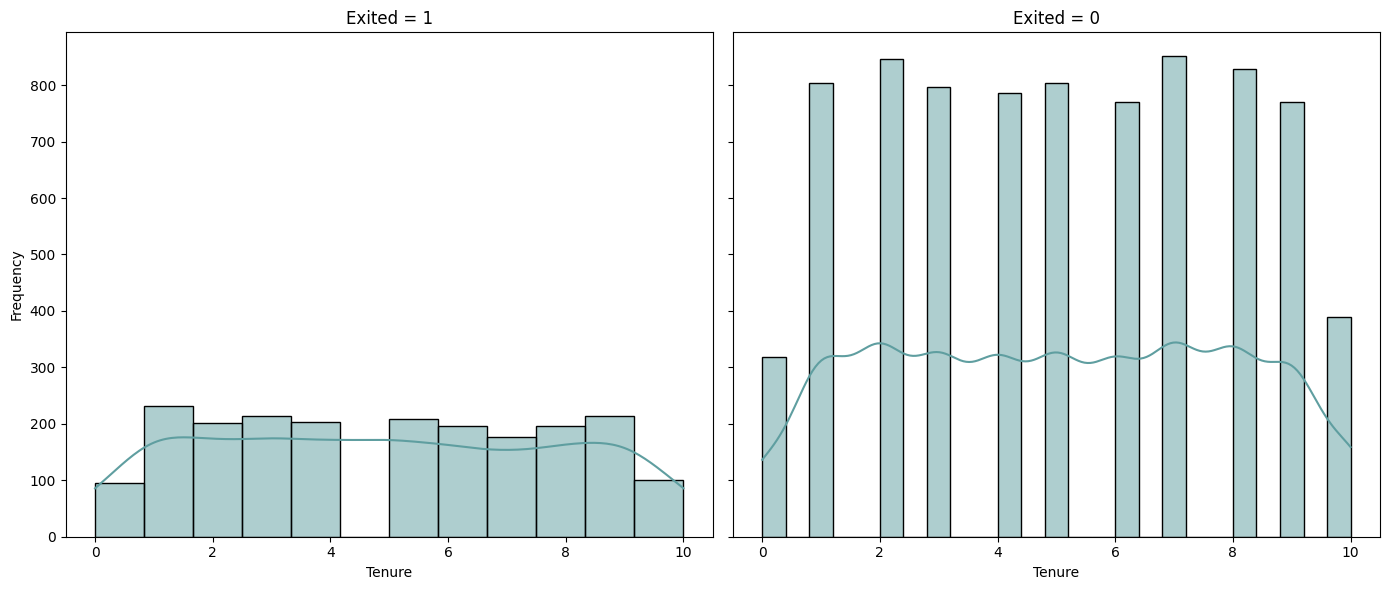

In [20]:
plot_churned_histograms("Tenure", "cadetblue")

In [21]:
data2['TenureCut'] = pd.qcut(data2['Tenure'], 4)
data2.groupby(['TenureCut'], as_index=False)['Exited'].mean()

,TenureCut,Exited
0,"(-0.001, 3.0]",0.211412
1,"(3.0, 5.0]",0.205897
2,"(5.0, 7.0]",0.186967
3,"(7.0, 10.0]",0.204482


In [22]:
def categorize_tenure(tenure):
    '''Categorizes age into bins'''
    if pd.isna(tenure):
        return None  
    elif tenure <= 3:
        return 0
    elif 3 <= tenure <= 5:
        return 1
    elif 5 <= tenure <= 7:
        return 2
    elif 7 < tenure <= 10:
        return 3
    else: 
        return 4

data2['Tenure'] = data2['Tenure'].apply(categorize_tenure)

data2.groupby(['Tenure'], as_index=False)['Exited'].mean()

,Tenure,Exited
0,0,0.211412
1,1,0.205897
2,2,0.186967
3,3,0.204482


### 4. Loyalty Index

In [23]:
data2['LoyaltyIndex'] = (data2['Tenure']) + (data2['IsActiveMember'] * 2) + (data2['NumOfProducts'] )
numerical_cols2.append('LoyaltyIndex')

### 5. Balance Above 0

In [24]:
data2['BalanceAboveZero'] = (data2['Balance']==0).astype(int)
numerical_cols2.append('BalanceAboveZero')

#### Plot Correlation Heatmap Again

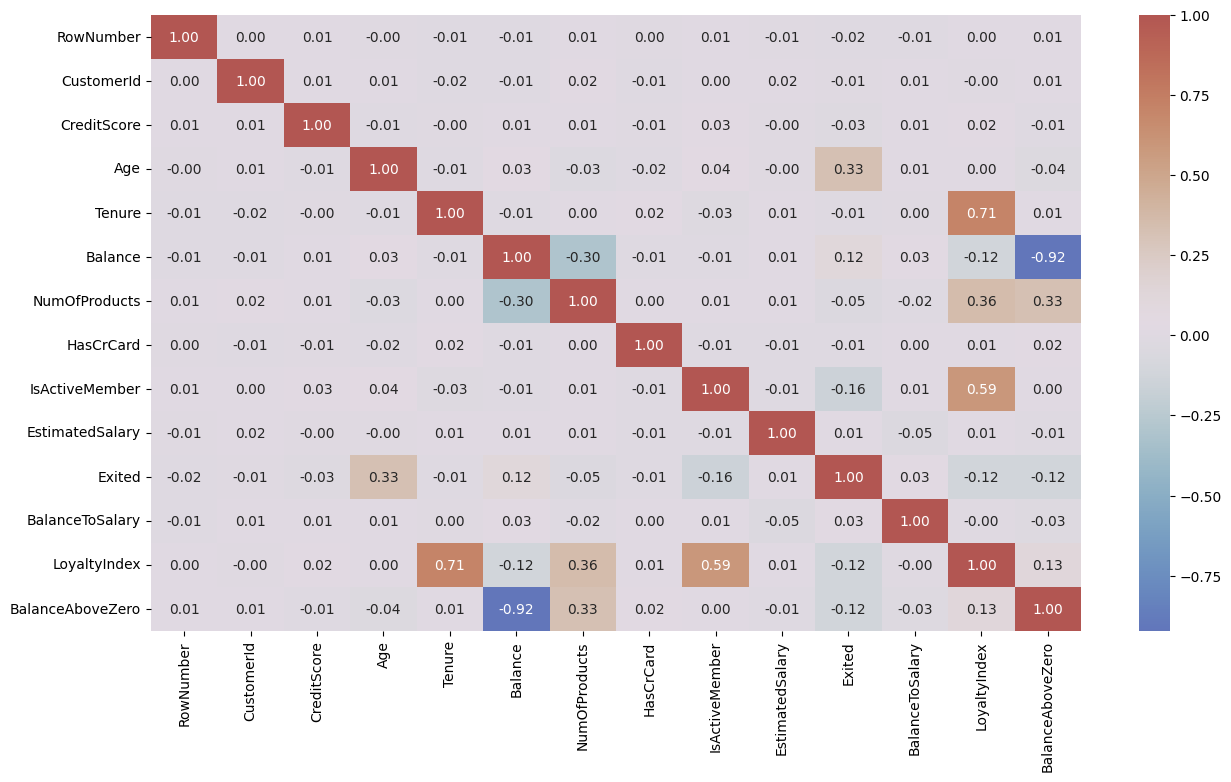

In [25]:
cmap = mcolors.LinearSegmentedColormap.from_list("cropped_cmap", plt.get_cmap('twilight_shifted')(np.linspace( 0.25 , 0.75, 256)))

plt.figure(figsize=(15,8))
sns.heatmap(data2[numerical_cols2].corr(), annot=True, cmap = cmap, fmt='.2f')
plt.show()

## Selecting Features

In [26]:
features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

features2 = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
           'BalanceAboveZero', 'LoyaltyIndex', 'BalanceToSalary']

# Preprocessing
## 1. Split the data

In [27]:
X = data[features]
y = data.Exited

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
X2 = data2[features2]
y2 = data2.Exited

train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

## 2. Create Pipeline
- I will use OneHot encoding for the Geographical column, and the Gender columns
- Then I will use StandardScaler

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Geography', 'Gender']),
        ('scaler', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']) 
    ],
    remainder='passthrough'
)

preprocessor2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Geography', 'Gender']),
        ('scaler', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceAboveZero', 'LoyaltyIndex', 'BalanceToSalary']) 
    ],
    remainder='passthrough'
)

# Create Models
## Model 1: Random Forest Classifier
A **Random Forest Classifier** is like a collection of decision trees that work together to make predictions.(Idea: a group of people (trees) each giving their opinion on a question, and the final decision is made based on the majority vote)

**Cross-validation** splits the data into multiple training and validation sets to evaluate the model’s performance and robustness. It averages the results to provide a more reliable measure of how well the model generalizes to unseen data.

In [30]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [150, 200, 300],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

pipe_rf = make_pipeline(preprocessor, grid_search_rf)

pipe_rf.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 15, 20],
                                          'min_samples_leaf': [2, 4, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300]}))])

In [88]:
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best score: {grid_search_rf.best_score_}")

model_name.append('Random Forest Classifier')
train_acc.append(metrics.accuracy_score(train_y, pipe_rf.predict(train_X)))
test_acc.append(metrics.accuracy_score(val_y, pipe_rf.predict(val_X)))
precision.append(metrics.precision_score(val_y, pipe_rf.predict(val_X)))
recall.append(metrics.recall_score(val_y, pipe_rf.predict(val_X)))
f1.append(metrics.f1_score(val_y, pipe_rf.predict(val_X)))

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best score: 0.86175


### Visualize Model 1
A **confusion matrix** shows the true positives, false positives, true negatives, and false negatives for each class, which helps you understand how well your classifier is performing. <br />
I will also plot the **feature importances** to identify which features contribute most to the predictions of the model.

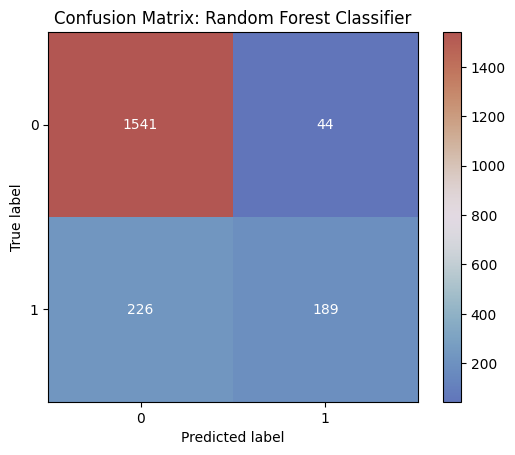

In [32]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_rf, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white')  

disp.ax_.set_title('Confusion Matrix: Random Forest Classifier')

plt.show()

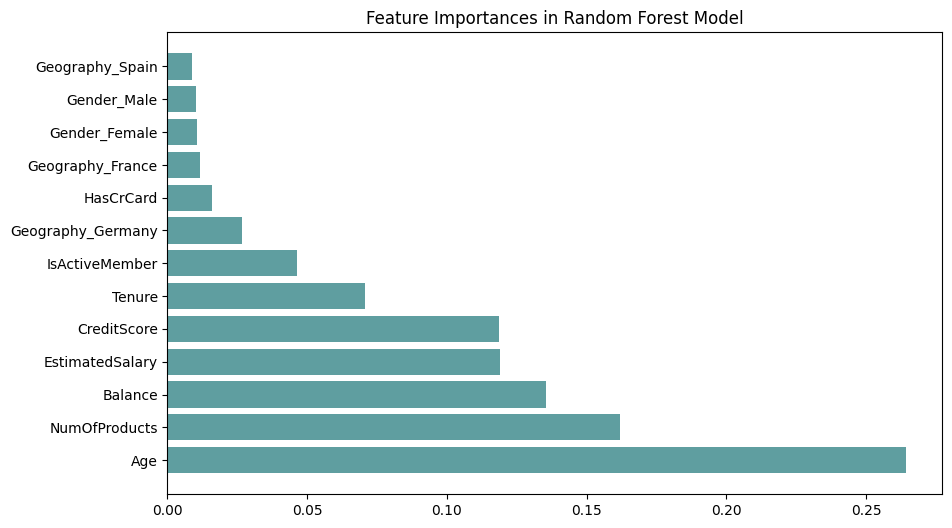

In [33]:
best_rf_model = grid_search_rf.best_estimator_

importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

encoded_columns = pipe_rf.named_steps['columntransformer'].named_transformers_['onehot'].get_feature_names_out(['Geography', 'Gender'])

all_feature_names = np.concatenate([encoded_columns, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']])

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align='center', color = 'cadetblue')
plt.yticks(range(len(importances)), [all_feature_names[i] for i in indices])
plt.title("Feature Importances in Random Forest Model")
plt.show()

## Model 2: Logistic Regression
**Logistic regression** is used for binary classification. It takes input features, combines them linearly, and passes the result through a sigmoid function to produce a probability between 0 and 1. This probability is then used to classify the input into one of two classes, usually by applying a threshold (commonly 0.5).

In [34]:
lr_model = LogisticRegression()

param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5)

pipe_lr= make_pipeline(preprocessor, grid_search_lr)
pipe_lr.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [89]:
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best score: {grid_search_lr.best_score_}")

model_name.append('Logistic Regression')
train_acc.append(metrics.accuracy_score(train_y, pipe_lr.predict(train_X)))
test_acc.append(metrics.accuracy_score(val_y, pipe_lr.predict(val_X)))
precision.append(metrics.precision_score(val_y, pipe_lr.predict(val_X)))
recall.append(metrics.recall_score(val_y, pipe_lr.predict(val_X)))
f1.append(metrics.f1_score(val_y, pipe_lr.predict(val_X)))

Best parameters: {'C': 1.0}
Best score: 0.8112499999999999


### Visualize Model 2

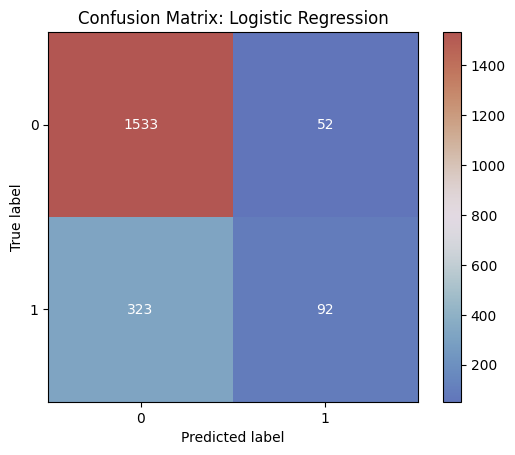

In [36]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_lr, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white')  

disp.ax_.set_title('Confusion Matrix: Logistic Regression')
    
plt.show()

## Model 3: Support Vector Machine Model
**Support Vector Machine** (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds the best boundary (hyperplane) that separates different classes by maximizing the margin between them.

In [48]:
svc_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear','rbf']
}

grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5)

pipe_svc = make_pipeline(preprocessor, grid_search_svc)

pipe_svc.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10],
                                          'kernel': ['linear', 'rbf']}))])

In [90]:
print(f"Best parameters: {grid_search_svc.best_params_}")
print(f"Best score: {grid_search_svc.best_score_}")

model_name.append('SVC Model')
train_acc.append(metrics.accuracy_score(train_y, pipe_svc.predict(train_X)))
test_acc.append(metrics.accuracy_score(val_y, pipe_svc.predict(val_X)))
precision.append(metrics.precision_score(val_y, pipe_svc.predict(val_X)))
recall.append(metrics.recall_score(val_y, pipe_svc.predict(val_X)))
f1.append(metrics.f1_score(val_y, pipe_svc.predict(val_X)))

Best parameters: {'C': 1, 'kernel': 'rbf'}
Best score: 0.8542500000000001


### Visualize Model 3

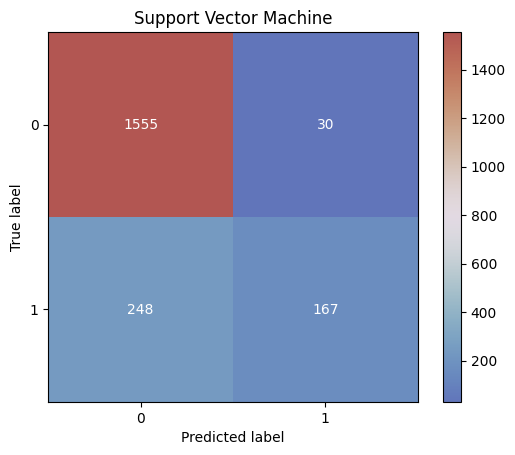

In [50]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_svc, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white')  

disp.ax_.set_title('Support Vector Machine')
    
plt.show()

## Model 4: K-Nearest Neighbours
**K-Nearest Neighbors** makes predictions based on the similarity of data points. The idea is that similar things exist in close proximity to each other.

In [43]:
knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

pipe_knn= make_pipeline(preprocessor, grid_search_knn)
pipe_knn.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [91]:
print(f"Best parameters: {grid_search_knn.best_params_}")
print(f"Best score: {grid_search_knn.best_score_}")

model_name.append('KNN Classifier')
train_acc.append(metrics.accuracy_score(train_y, pipe_knn.predict(train_X)))
test_acc.append(metrics.accuracy_score(val_y, pipe_knn.predict(val_X)))
precision.append(metrics.precision_score(val_y, pipe_knn.predict(val_X)))
recall.append(metrics.recall_score(val_y, pipe_knn.predict(val_X)))
f1.append(metrics.f1_score(val_y, pipe_knn.predict(val_X)))

Best parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best score: 0.844125


### Visualize Model 4

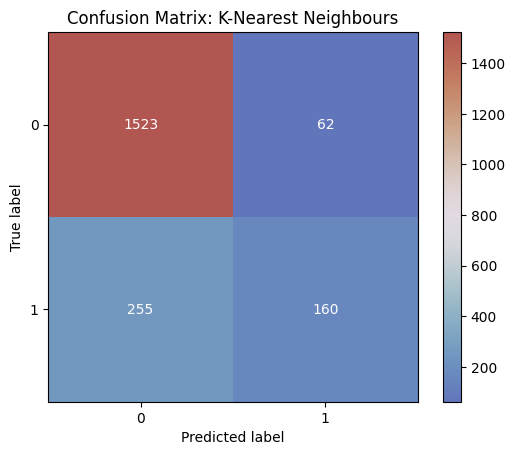

In [45]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_knn, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white')  

disp.ax_.set_title('Confusion Matrix: K-Nearest Neighbours')
    
plt.show()

## Model 5: XGBoost
**XGBoost** builds a series of decision trees sequentially, where each tree corrects the errors of the previous ones. It uses gradient boosting techniques and regularization to improve accuracy and prevent overfitting.

In [40]:
xgb_model = XGBClassifier()

param_grid = {
     'n_estimators': [100, 200, 300],
     'booster': ['gbtree', 'gblinear','dart'],
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

pipe_xgb= make_pipeline(preprocessor, grid_search_xgb)
pipe_xgb.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=XGBClassifier(base_score=None,
                                                      boos...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart'],
                                          'n_estimators': [100, 200, 300]}))])

In [92]:
print(f"Best parameters: {grid_search_xgb.best_params_}")
print(f"Best score: {grid_search_xgb.best_score_}")

model_name.append('XGBClassifier')
train_acc.append(metrics.accuracy_score(train_y, pipe_xgb.predict(train_X)))
test_acc.append(metrics.accuracy_score(val_y, pipe_xgb.predict(val_X)))
precision.append(metrics.precision_score(val_y, pipe_xgb.predict(val_X)))
recall.append(metrics.recall_score(val_y, pipe_xgb.predict(val_X)))
f1.append(metrics.f1_score(val_y, pipe_xgb.predict(val_X)))

Best parameters: {'booster': 'gbtree', 'n_estimators': 100}
Best score: 0.851375


### Visualize Model 5

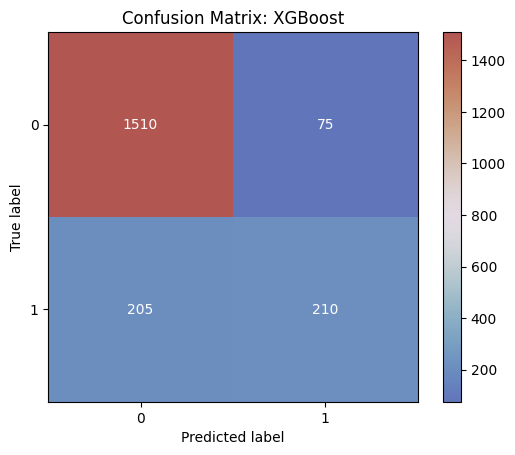

In [41]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_xgb, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white') 

disp.ax_.set_title('Confusion Matrix: XGBoost')
    
plt.show()

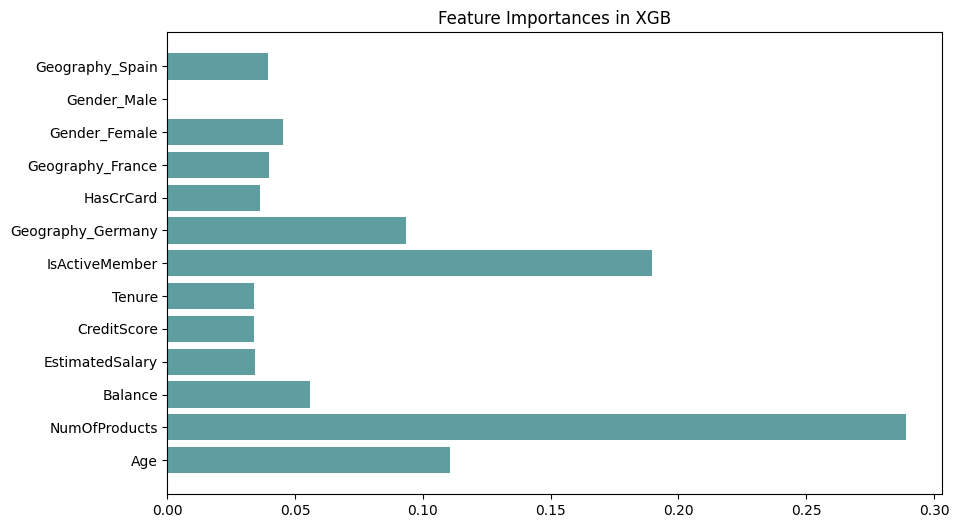

In [42]:
best_xgb_model = grid_search_xgb.best_estimator_
importances = best_xgb_model.feature_importances_

encoded_columns = pipe_xgb.named_steps['columntransformer'].named_transformers_['onehot'].get_feature_names_out(['Geography', 'Gender'])

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align='center', color = 'cadetblue')
plt.yticks(range(len(importances)), [all_feature_names[i] for i in indices])
plt.title("Feature Importances in XGB")
plt.show()

# Create Models After Feature Engineering
## Model 1: Random Forest Classifier

In [51]:
rf_model_2 = RandomForestClassifier()

param_grid = {
    'n_estimators': [150, 200, 300],
    #'min_samples_split': [5, 10, 15],
    'max_depth': [10, 15, 20],
    #'min_samples_leaf': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search_rf_2 = GridSearchCV(estimator=rf_model_2, param_grid=param_grid, cv=5)

pipe_rf_2 = make_pipeline(preprocessor, grid_search_rf_2)

pipe_rf_2.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 15, 20],
                                          'n_estimators': [150, 200, 300]}))])

In [93]:
print(f"Best parameters: {grid_search_rf_2.best_params_}")
print(f"Best score: {grid_search_rf_2.best_score_}")

model_name.append('Random Forest Classifier (Features)')
train_acc.append(metrics.accuracy_score(train_y2, pipe_rf_2.predict(train_X2)))
test_acc.append(metrics.accuracy_score(val_y2, pipe_rf_2.predict(val_X2)))
precision.append(metrics.precision_score(val_y2,pipe_rf_2.predict(val_X2)))
recall.append(metrics.recall_score(val_y2, pipe_rf_2.predict(val_X2)))
f1.append(metrics.f1_score(val_y2, pipe_rf_2.predict(val_X2)))

Best parameters: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
Best score: 0.8608750000000001


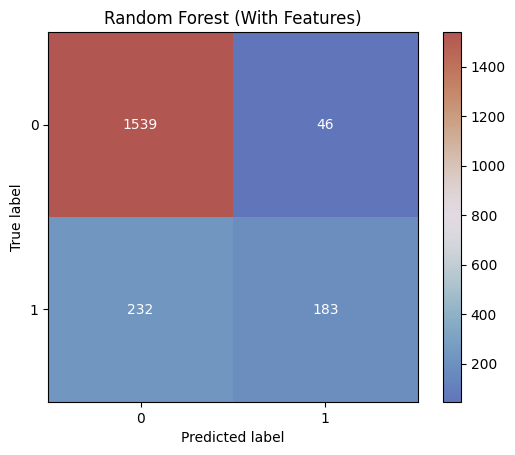

In [67]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_rf_2, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white') 

disp.ax_.set_title('Random Forest (With Features)')
    
plt.show()

## Model 2: Logistic Regression

In [64]:
lr_model_2 = LogisticRegression()

param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

grid_search_lr_2 = GridSearchCV(estimator=lr_model_2, param_grid=param_grid, cv=5)

pipe_lr_2= make_pipeline(preprocessor, grid_search_lr_2)
pipe_lr_2.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [94]:
print(f"Best parameters: {grid_search_lr_2.best_params_}")
print(f"Best score: {grid_search_lr_2.best_score_}")

model_name.append('Logistic Regression (Features)')
train_acc.append(metrics.accuracy_score(train_y2, pipe_lr_2.predict(train_X2)))
test_acc.append(metrics.accuracy_score(val_y2, pipe_lr_2.predict(val_X2)))
precision.append(metrics.precision_score(val_y2, pipe_lr_2.predict(val_X2)))
recall.append(metrics.recall_score(val_y2, pipe_lr_2.predict(val_X2)))
f1.append(metrics.f1_score(val_y2, pipe_lr_2.predict(val_X2)))

Best parameters: {'C': 1.0}
Best score: 0.8112499999999999


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


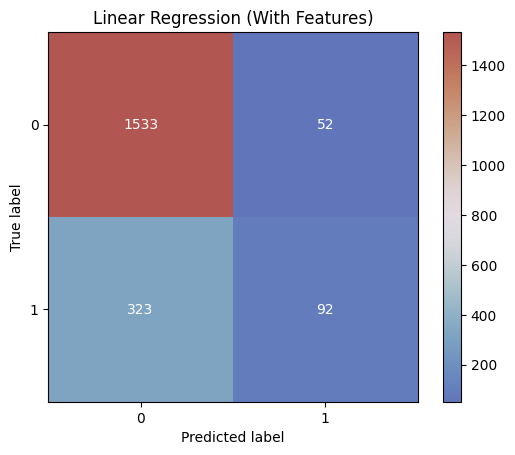

In [68]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_lr_2, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white') 

disp.ax_.set_title('Linear Regression (With Features)')
    
plt.show()

## Model 3: Support Vector Machine Model

In [69]:
svc_model_2 = SVC()

param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear','rbf', 'poly']
}

grid_search_svc_2 = GridSearchCV(estimator=svc_model_2, param_grid=param_grid, cv=5)

pipe_svc_2 = make_pipeline(preprocessor, grid_search_svc_2)

pipe_svc_2.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10],
                                          'kernel': ['linear', 'rbf',
                                                     'poly']}))])

In [95]:
print(f"Best parameters: {grid_search_svc_2.best_params_}")
print(f"Best score: {grid_search_svc_2.best_score_}")

model_name.append('SVC Model (Features)')
train_acc.append(metrics.accuracy_score(train_y2, pipe_svc_2.predict(train_X2)))
test_acc.append(metrics.accuracy_score(val_y2, pipe_svc_2.predict(val_X2)))
precision.append(metrics.precision_score(val_y2, pipe_svc_2.predict(val_X2)))
recall.append(metrics.recall_score(val_y2, pipe_svc_2.predict(val_X2)))
f1.append(metrics.f1_score(val_y2, pipe_svc_2.predict(val_X2)))

Best parameters: {'C': 10, 'kernel': 'poly'}
Best score: 0.8578749999999999


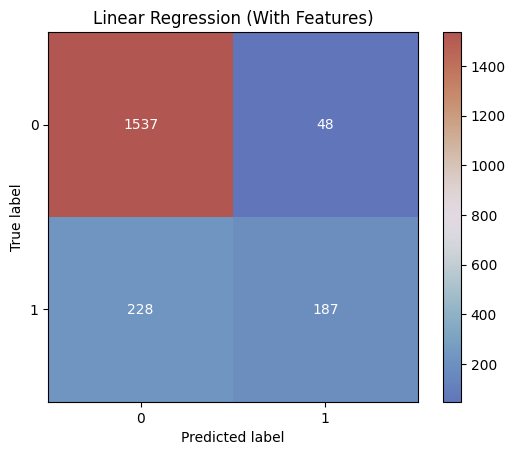

In [71]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_svc_2, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white') 

disp.ax_.set_title('SVM (With Features)')
    
plt.show()

## Model 4: K-Nearest Neighbours

In [70]:
knn_model_2 = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

grid_search_knn_2 = GridSearchCV(estimator=knn_model_2, param_grid=param_grid, cv=5)

pipe_knn_2= make_pipeline(preprocessor, grid_search_knn_2)
pipe_knn_2.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [96]:
print(f"Best parameters: {grid_search_knn_2.best_params_}")
print(f"Best score: {grid_search_knn_2.best_score_}")

model_name.append('KNN Classifier (Features)')
train_acc.append(metrics.accuracy_score(train_y, pipe_knn_2.predict(train_X)))
test_acc.append(metrics.accuracy_score(val_y, pipe_knn_2.predict(val_X)))
precision.append(metrics.precision_score(val_y, pipe_knn_2.predict(val_X)))
recall.append(metrics.recall_score(val_y, pipe_knn_2.predict(val_X)))
f1.append(metrics.f1_score(val_y, pipe_knn_2.predict(val_X)))

Best parameters: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best score: 0.844125


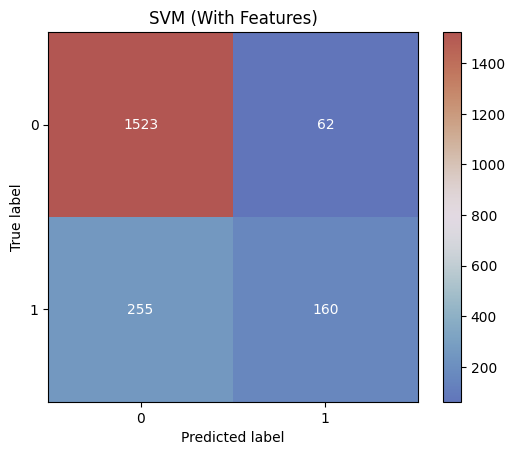

In [72]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_knn_2, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white') 

disp.ax_.set_title('SVM (With Features)')
    
plt.show()

## Model 5: XGBoost

In [73]:
xgb_model_2 = XGBClassifier()

param_grid = {
     'n_estimators': [100, 200, 300],
     'booster': ['gbtree', 'gblinear','dart'],
}

grid_search_xgb_2 = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid, cv=5)

pipe_xgb_2= make_pipeline(preprocessor, grid_search_xgb_2)
pipe_xgb_2.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('scaler', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=XGBClassifier(base_score=None,
                                                      boos...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart'],
                                          'n_estimators': [100, 200, 300]}))])

In [97]:
print(f"Best parameters: {grid_search_xgb_2.best_params_}")
print(f"Best score: {grid_search_xgb_2.best_score_}")

model_name.append('XGBClassifier (Features)')
train_acc.append(metrics.accuracy_score(train_y2, pipe_xgb_2.predict(train_X2)))
test_acc.append(metrics.accuracy_score(val_y2, pipe_xgb_2.predict(val_X2)))
precision.append(metrics.precision_score(val_y2, pipe_xgb_2.predict(val_X2)))
recall.append(metrics.recall_score(val_y2, pipe_xgb_2.predict(val_X2)))
f1.append(metrics.f1_score(val_y2, pipe_xgb_2.predict(val_X2)))

Best parameters: {'booster': 'gbtree', 'n_estimators': 100}
Best score: 0.851375


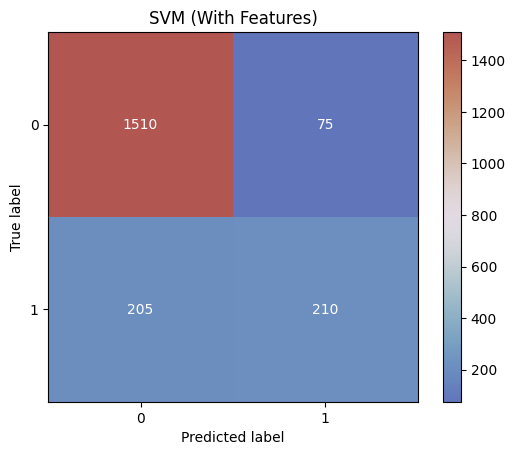

In [86]:
disp = ConfusionMatrixDisplay.from_estimator(pipe_xgb_2, val_X, val_y, cmap=cmap)
for text in disp.ax_.texts:
    text.set_color('white') 

disp.ax_.set_title('SVM (With Features)')
    
plt.show()

# Summary

In [98]:
dict = {'Model Name': model_name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'Precision': precision, 'Recall': recall, 'F1-score':f1}
model_df = pd.DataFrame(dict)  
model_df.style.background_gradient()

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
0,Random Forest Classifier,0.925500,0.865000,0.811159,0.455422,0.583333
1,Logistic Regression,0.812000,0.812500,0.638889,0.221687,0.329159
2,SVC Model,0.866125,0.861000,0.847716,0.402410,0.545752
3,KNN Classifier,0.863375,0.841500,0.720721,0.385542,0.502355
4,XGBClassifier,0.956750,0.860000,0.736842,0.506024,0.600000
5,Random Forest Classifier (Feature Eng),0.831250,0.816000,0.898305,0.127711,0.223629
6,Logistic Regression (Features),0.797250,0.792500,0.000000,0.000000,0.000000
7,SVC Model (Features),0.255000,0.252000,0.192373,0.814458,0.311234
8,KNN Classifier (Features),0.863375,0.841500,0.720721,0.385542,0.502355
9,XGBClassifier (Features),0.826250,0.811000,0.877551,0.103614,0.185345


## Results
- **Best Performing Model:** Random Forest Classifier
- **Worst Performing Model:** SVC Model (Features)
- Interestingly, models trained on the original features outperformed those utilizing feature-engineered data. Investigating the reasons behind this unexpected result could provide valuable insights into the feature engineering process and its impact on model performance.
- Age appears to be a significant predictor of customer churn. This finding suggests that the bank should explore the underlying reasons for why age is such a strong indicator. Implementing targeted promotions or incentives for customers in high-risk age groups could be an effective strategy for reducing churn and retaining these valuable customers.